# Correlation analysis between population and average rent in Berlin between 2012 and 2022

## Research Question
To what extent does the population of Berlin correlate with its average rent between the years 2012 and 2022?

## Region and Domain
- Region: Berlin, Germany
- Domain: Real estate

## Data Sources
- [Average rent price of residential property in selected cities in Germany from 2013 to 2022](https://www.statista.com/statistics/801560/average-rent-price-of-residential-property-in-germany-by-city/)
- [Population: Länder, reference date](https://www-genesis.destatis.de/genesis/online?sequenz=statistikTabellen&selectionname=12411&language=en#abreadcrumb)

## Code
To begin, let's import the necessary libraries.

In [2]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### Generating DataFrames
The subsequent code snippet generates a DataFrame containing 'Berlin population' data from 2012 to 2022.

In [4]:
# Read the population csv file and assign it to an object named 'pop'
pop = pd.read_csv("assets/population-by-german-city.csv")

# Transpose the DataFrame and set the first column as the index
transposed_pop = pop.T
transposed_pop.columns = transposed_pop.iloc[0]
transposed_pop = transposed_pop[1:]

# Filter the DataFrame with Berlin populations from 2012 to 2022
berlin_pop = transposed_pop["Berlin"]
berlin_pop = berlin_pop[4:]

# Extract the years from the index and add a 'Year' column
berlin_pop.index = pd.to_datetime(berlin_pop.index).year
berlin_pop = berlin_pop.reset_index()
berlin_pop.rename(columns={'index': 'Year', 'Berlin': 'Berlin population'}, inplace=True)

# Format the values with commas for thousands
berlin_pop['Berlin population'] = berlin_pop['Berlin population'].astype('int')
#berlin_pop['Berlin population'] = berlin_pop['Berlin population'].apply(lambda x: f"{x:,}")

berlin_pop

,Year,Berlin population
0,2012,3375222
1,2013,3421829
2,2014,3469849
3,2015,3520031
4,2016,3574830
5,2017,3613495
6,2018,3644826
7,2019,3669491
8,2020,3664088
9,2021,3677472


In a similar manner, the provided code segment creates a DataFrame showcasing the time-series average rents in Berlin.

In [5]:
# Read the rent csv file and assign it to an object named 'rent'
rent = pd.read_csv("assets/average-rent-by-german-city.csv")

# Set an index with the year data column and filter average rent data in Berlin
rent = rent.set_index(rent.columns[0])
berlin_rent = rent["Berlin"]

# Rename the column
berlin_rent = berlin_rent.rename("Average rent in Berlin")

# Convert the index to a column 'Year'
berlin_rent = berlin_rent.reset_index()
berlin_rent.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

berlin_rent

,Year,Average rent in Berlin
0,2012,7.01
1,2013,7.61
2,2014,7.89
3,2015,8.05
4,2016,8.69
5,2017,9.54
6,2018,10.26
7,2019,9.88
8,2020,10.12
9,2021,10.50


### Time-Series Chart for Trend Analysis
Now, we will merge the two datasets and visualize them through a time-series line chart. This chart will effectively depict the trends of 'Berlin population' and 'Average rent in Berlin' over time.

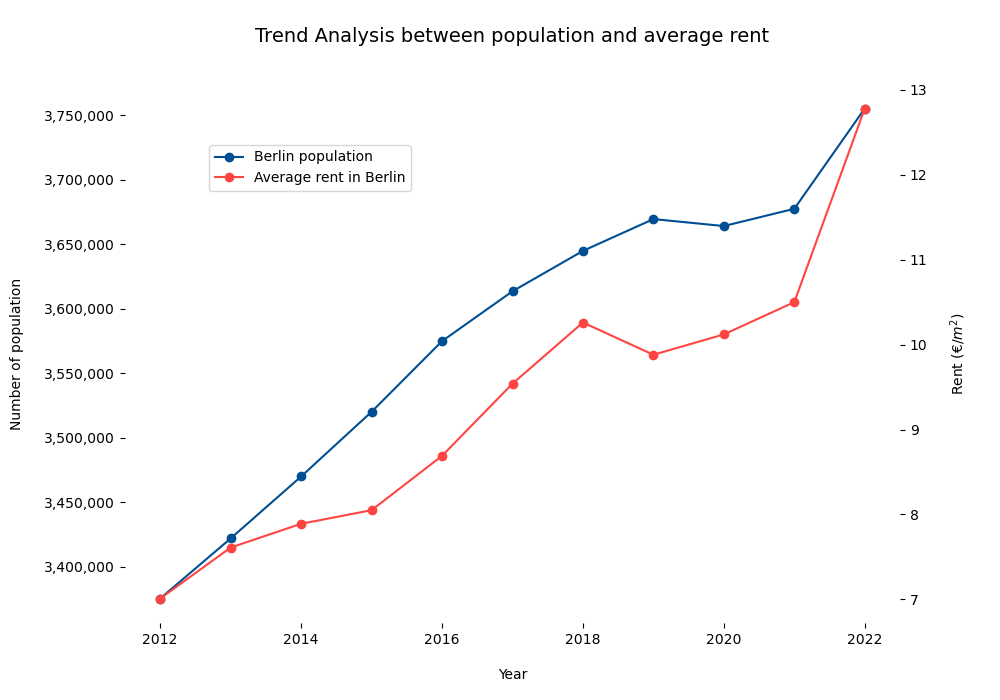

In [6]:
# Merge the 'berlin_pop' and 'berlin_rent' DataFrames using the 'Year' column
merged_df = pd.merge(berlin_pop, berlin_rent, how='left', left_on='Year', right_on='Year')
merged_df.set_index('Year', inplace=True)

# Set the variables for 'Berlin population' and 'Average rent in Berlin'
pop_col = merged_df['Berlin population']
rent_col = merged_df['Average rent in Berlin']

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot 'Berlin population' on the left y-axis (ax1)
line1 = ax1.plot(pop_col, color='#004F92', marker='o', label='Berlin population')
ax1.set_xlabel('Year', labelpad=15)
ax1.set_ylabel('Number of population', labelpad=15)

# Set y-axis ticks with thousands separators
ax1.get_yaxis().set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'Average rent in Berlin' on the right y-axis (ax2)
line2 = ax2.plot(rent_col, color='#ff4542', marker='o', label='Average rent in Berlin')
ax2.set_ylabel('Rent (€$/m^2$)', labelpad=15)

# Combine the two lines and labels for the legend.
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Adjust the bbox_to_anchor coordinates

# Set a title
plt.title('Trend Analysis between population and average rent', size=14, pad=30)

# Remove the frame of the chart
for spine in ax1.spines.values():
    spine.set_visible(False)

for spine in ax2.spines.values():
    spine.set_visible(False)    

# Display the line chart
plt.show()

The time-series chart reveals that both 'Berlin population' and 'Average rent in Berlin' exhibit similar trends. This observation suggests a potential correlation between these two variables.

### Correlation Analysis Using Scatter Plot and R-Square
To delve deeper, we will utilize a scatter plot and calculate the R square value to quantitatively assess the correlation between the two variables.

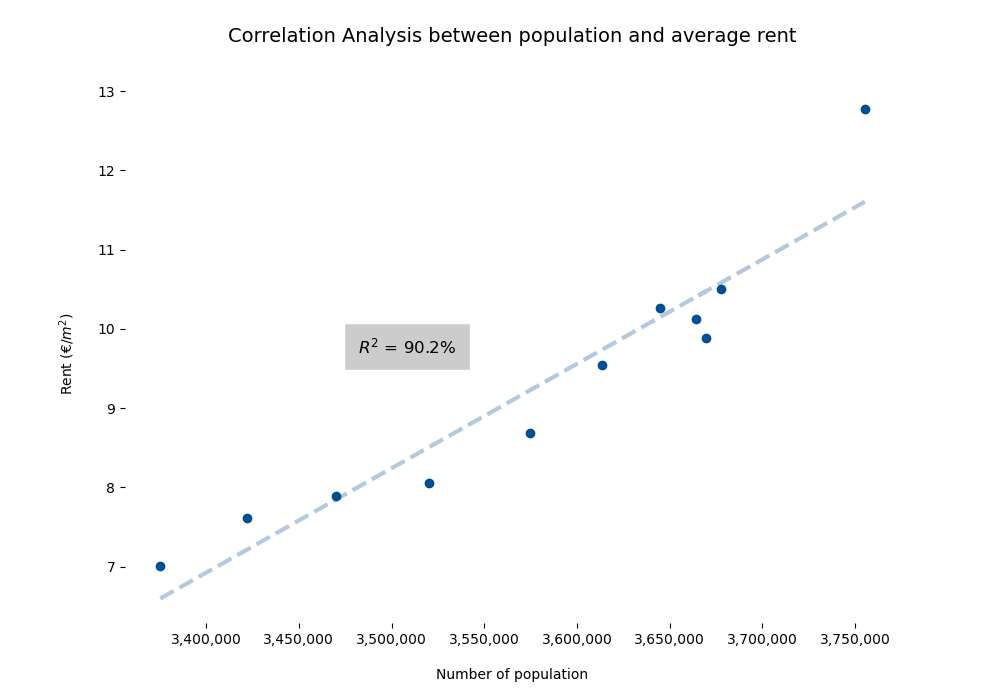

In [8]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.scatter(pop_col, rent_col, color='#004F92');

# Set x- and y-labels
ax1.set_xlabel('Number of population', labelpad=15)  # Adjust the labelpad as needed
ax1.set_ylabel('Rent (€$/m^2$)', labelpad=15)  # Adjust the labelpad as needed

# Set x-axis ticks with thousands separators
ax1.get_xaxis().set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Set a title
plt.title('Correlation Analysis between population and average rent', size=14, pad=30)

# Calculate equation for trendline
z = np.polyfit(pop_col, rent_col, 1)
p = np.poly1d(z)

# Add trendline to plot
plt.plot(pop_col, p(pop_col), color="#004F92", alpha=0.3, linewidth=3, linestyle="--")

# Calculate R-squared value
residuals = rent_col - p(pop_col)
ssr = np.sum(residuals**2)
sst = np.sum((rent_col - np.mean(rent_col))**2)
r_squared = 1 - (ssr / sst)

# Define text position and style
text_x = 0.3
text_y = 0.5
text = f'$R^2$ = {r_squared:.1%}'
font_props = {'fontsize': 12, 'color': 'black', 'bbox': dict(facecolor='#cccccc', edgecolor='#ffffff', pad=10)}

# Add the text annotation
ax1.text(text_x, text_y, text, transform=ax1.transAxes, **font_props)

# Remove the frame of the chart
for spine in ax1.spines.values():
    spine.set_visible(False)

# Display the scatter plot
plt.show()

## Discussion
The two plots illustrate the correlation between the population and average rent in Berlin. The first chart depicts the trends of both variables from 2012 to 2022. Notably, in 2019 and 2020, the trends of these variables diverge. The population saw an increase in 2019 compared to 2018, while the rent witnessed a decrease. However, this pattern was reversed in 2020, with a decrease in population accompanied by a rise in rent. Throughout the rest of the time series, both variables exhibit consistent upward trends.

The scatter plot further emphasizes the strong correlation between these two factors. The calculated R squared value of 90.2% highlights that the population in Berlin can account for approximately 90% of the variations in increased rent. Interestingly, there is a noticeable outlier in 2022, indicated by a larger residual as its data point deviates significantly from the regression line.